<br><br><center><h1 style="font-size:3em;color:#2467C0"> Soccer Data Analysis</h1></center>
<br><br><center><h1 style="font-size:2em;color:#2467C0"> K Mean clustering</h1></center>


In [8]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from customplot import *

In [9]:
# Creating connection.
cnx = sqlite3.connect('database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)
# Player_Attribute = Table

## Exploring Data



In [10]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [11]:
# simple statistics of our dataset
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,183978.0,91989.500000,53110.018250,1.0,45995.25,91989.5,137983.75,183978.0
player_fifa_api_id,183978.0,165671.524291,53851.094769,2.0,155798.00,183488.0,199848.00,234141.0
player_api_id,183978.0,135900.617324,136927.840510,2625.0,34763.00,77741.0,191080.00,750584.0
overall_rating,183142.0,68.600015,7.041139,33.0,64.00,69.0,73.00,94.0
potential,183142.0,73.460353,6.592271,39.0,69.00,74.0,78.00,97.0
crossing,183142.0,55.086883,17.242135,1.0,45.00,59.0,68.00,95.0
finishing,183142.0,49.921078,19.038705,1.0,34.00,53.0,65.00,97.0
heading_accuracy,183142.0,57.266023,16.488905,1.0,49.00,60.0,68.00,98.0
short_passing,183142.0,62.429672,14.194068,3.0,57.00,65.0,72.00,97.0
volleys,181265.0,49.468436,18.256618,1.0,35.00,52.0,64.00,93.0


## Data Cleaning: Handling Missing Data

In [12]:
#if any row NULL ?
df.isnull().any().any(), df.shape

(True, (183978, 42))

Finding data points in each column whichare null.

In [13]:
#Row - 1  || Column = 0 -> By default
df.isnull().sum(axis = 0)

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

### Fixing Null Values by Deleting Them



In [14]:
#Dropping null values by going through each row.
rows = df.shape[0]
rows

183978

In [15]:
# Drop the NULL rows
df = df.dropna()

In [16]:
#Check if all NULLS are gone ?
print(rows)
df.isnull().any().any(), df.shape

183978


(False, (180354, 42))

In [17]:
#How many rows with NULL values?
#183978 - 180354

rows - df.shape[0]

3624

Our data table has many lines and we can only look at few lines at once. Instead of looking at same top 10 lines every time, we shuffle - so we get to see different random sample on top. This way, we make sure the data is not in any particular order when we try sampling from it by randomly shuffling the rows.

In [18]:
#Shuffle the rows of df so we get a distributed sample when we display top few rows
df = df.reindex(np.random.permutation(df.index))


### Diving into clean dataset further.

In [19]:
df.head(5)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
121687,121688,194190,179365,2011-02-22 00:00:00,66.0,69.0,right,high,high,38.0,...,58.0,37.0,61.0,66.0,63.0,15.0,8.0,12.0,10.0,12.0
147268,147269,198240,498603,2011-02-22 00:00:00,59.0,66.0,left,high,medium,45.0,...,51.0,46.0,65.0,62.0,63.0,12.0,5.0,10.0,14.0,8.0
114265,114266,152961,13554,2015-04-24 00:00:00,64.0,64.0,right,medium,medium,49.0,...,39.0,41.0,64.0,63.0,73.0,9.0,13.0,9.0,13.0,15.0
83297,83298,184716,47558,2015-02-06 00:00:00,76.0,81.0,right,medium,medium,67.0,...,77.0,51.0,59.0,73.0,65.0,9.0,12.0,11.0,5.0,7.0
52768,52769,186550,115297,2015-09-21 00:00:00,70.0,70.0,left,high,low,71.0,...,49.0,50.0,64.0,67.0,69.0,14.0,9.0,12.0,15.0,11.0


In [20]:
df[['penalties', 'overall_rating']][:10]

,penalties,overall_rating
121687,37.0,66.0
147268,46.0,59.0
114265,41.0,64.0
83297,51.0,76.0
52768,50.0,70.0
183442,60.0,64.0
67935,45.0,71.0
125427,54.0,67.0
121138,75.0,79.0
123506,28.0,63.0


In [21]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
121687,121688,194190,179365,2011-02-22 00:00:00,66.0,69.0,right,high,high,38.0,...,58.0,37.0,61.0,66.0,63.0,15.0,8.0,12.0,10.0,12.0
147268,147269,198240,498603,2011-02-22 00:00:00,59.0,66.0,left,high,medium,45.0,...,51.0,46.0,65.0,62.0,63.0,12.0,5.0,10.0,14.0,8.0
114265,114266,152961,13554,2015-04-24 00:00:00,64.0,64.0,right,medium,medium,49.0,...,39.0,41.0,64.0,63.0,73.0,9.0,13.0,9.0,13.0,15.0
83297,83298,184716,47558,2015-02-06 00:00:00,76.0,81.0,right,medium,medium,67.0,...,77.0,51.0,59.0,73.0,65.0,9.0,12.0,11.0,5.0,7.0
52768,52769,186550,115297,2015-09-21 00:00:00,70.0,70.0,left,high,low,71.0,...,49.0,50.0,64.0,67.0,69.0,14.0,9.0,12.0,15.0,11.0


## Feature Correlation Analysis 
Next, we will check if 'penalties' is correlated to 'overall_rating'. We are using a similar selection operation, bu this time for all the rows and within the correlation function. 

### Pearson's correlation coefficient

In [22]:
df['overall_rating'].corr(df['penalties'])

0.392715107911188

We see that Pearson's Correlation Coefficient for these two columns is 0.39. <br>
Pearson goes from -1 to +1. A value of 0 would have told there is no correlation, so we shouldn’t bother looking at that attribute. A value of 0.39 shows some correlation, although it could be stronger. <br>
Now we see these attributes which are slightly correlated. This gives us an idea that we might be able to build a meaningful predictor using these ‘weakly’ correlated features.<br><br>


### Creating a list of potential Features that we want to measure correlation with

In [23]:
potentialFeatures = ['acceleration', 'curve', 'free_kick_accuracy', 'ball_control', 'shot_power', 'stamina']

The for loop below prints out the correlation coefficient of "overall_rating" of a player with each feature we added to the list as potential.

In [24]:
# check how the features are correlated with the overall ratings

for f in potentialFeatures:
    related = df['overall_rating'].corr(df[f])
    print("%s: %f" % (f,related))

acceleration: 0.243998
curve: 0.357566
free_kick_accuracy: 0.349800
ball_control: 0.443991
shot_power: 0.428053
stamina: 0.325606


## Which features have the highest correlation with overall_rating?

Looking at the values printed by the previous cell, we notice that the to two are "ball_control" (0.44) and "shot_power" (0.43). So these two features seem to have higher correlation with "overall_rating".


In [25]:
cols = ['potential',  'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes']

In [26]:
# create a list containing Pearson's correlation between 'overall_rating' with each column in cols
correlations = [ df['overall_rating'].corr(df[f]) for f in cols ]


In [27]:
len(cols), len(correlations)

(34, 34)

We make sure that the number of selected features and the correlations calculated are the same, e.g., both 34 in this case. Next couple of cells show some lines of code that use pandas plaotting functions to create a 2D graph of these correlation vealues and column names. 

In [35]:
def plot_dataframe(df, y_label):  
    ax = df.correlation.plot(linewidth=3.3, color='blue')
    ax.set_xticks(df.index)
    ax.set_xticklabels(df.attributes, rotation=75)
    
    fig = plt.gcf()
    fig.set_size_inches(20,12)
    plt.show()


In [33]:
# create a dataframe using cols and correlations

df2 = pd.DataFrame({'attributes': cols, 'correlation': correlations}) 

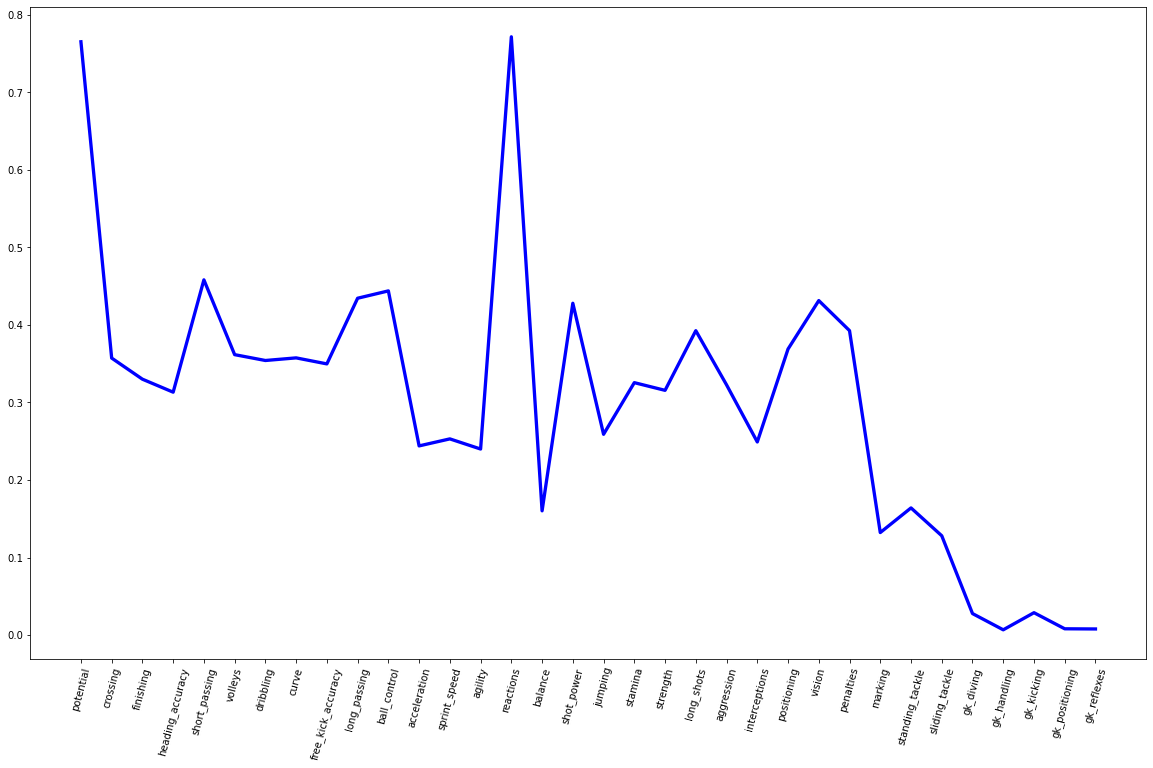

In [34]:
# let's plot above dataframe using the function we created
    
plot_dataframe(df2, 'Player\'s Overall Rating')

<h1 style="font-size:1.5em;color:#FB41C4"> Findings of Analysis </h1>

We can easily figure out using the above graph the top 5 or 10 features that can be used to pedict player's overall performance that is the ones with highest co relation using the graph

<h1 style="font-size:2em;color:#2467C0"> Applying K MEANS ALGORITHM </h1>

Clustering Players into Similar Groups based on these features


In [24]:
# Define the features you want to use for grouping players

select5features = ['gk_kicking', 'potential', 'marking', 'interceptions', 'standing_tackle']
select5features

['gk_kicking', 'potential', 'marking', 'interceptions', 'standing_tackle']

In [25]:
# Generate a new dataframe by selecting the features you just defined

df_select = df[select5features].copy(deep=True)

In [26]:
df_select.head()

,gk_kicking,potential,marking,interceptions,standing_tackle
123893,5.0,69.0,23.0,31.0,33.0
122108,8.0,72.0,57.0,57.0,64.0
68906,13.0,78.0,46.0,60.0,65.0
103196,11.0,82.0,71.0,73.0,73.0
159127,12.0,70.0,60.0,77.0,74.0


In [33]:
# Performing K MEAN - 
#scaling on the dataframe containing the features

data = scale(df_select)

# Define number of clusters
noOfClusters = 4

# Train a model
model = KMeans(init='k-means++', n_clusters=noOfClusters, n_init=20).fit(data)

In [34]:
print(90*'_')
print("\nCount of players in each cluster")
print(90*'_')

pd.value_counts(model.labels_, sort=False)

__________________________________________________________________________________________

Count of players in each cluster
__________________________________________________________________________________________


0    50050
1    55888
2    23777
3    50639
dtype: int64

In [35]:
# Creating a composite dataframe for plotting using custom function declared in customplot.py

P = pd_centers(featuresUsed=select5features, centers=model.cluster_centers_)
P

,gk_kicking,potential,marking,interceptions,standing_tackle,prediction
0,-0.336306,-0.848029,0.547506,0.405796,0.549638,0
1,-0.477138,0.106140,-0.947633,-0.975196,-0.914164,1
2,1.920675,0.038213,-1.111961,-0.653286,-1.201215,2
3,-0.042696,0.701441,1.026192,0.981304,1.029031,3


## Visualization of Clusters
We now have 4 clusters based on the features we selected, we can treat them as profiles for similar groups of players. We can visualize these profiles by plotting the centers for each cluster, i.e., the average values for each featuere within the cluster. We will use matplotlib for this visualization.

In [36]:
# For plotting the graph inside the notebook itself, we use the following command

%matplotlib inline

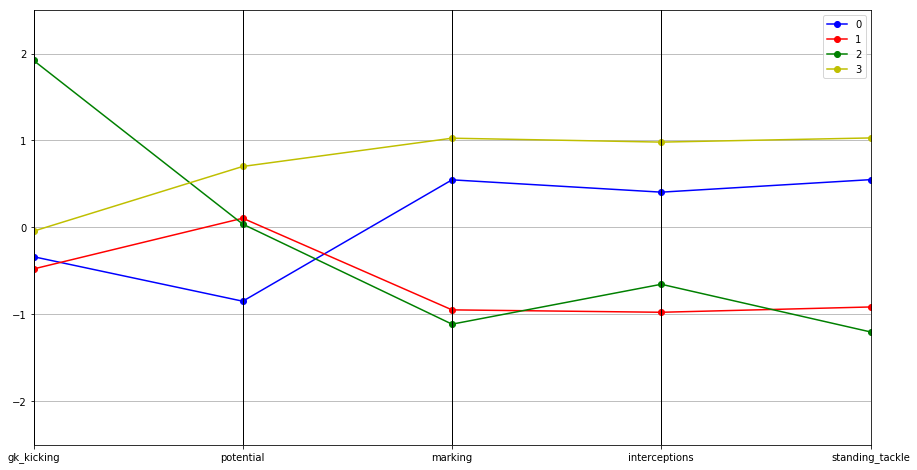

In [37]:
parallel_plot(P)

<h1 style="font-size:1.5em;color:#FB41C4">Analysis of Findings</h1>

<ul>
<li>Two groups are very similar except in `gk_kicking` - these players can coach each other on `gk_kicking`, where they differ.</li>
<li>Two groups are somewhat similar to each other except in potential.</li>
</ul>